
# Simple autoencoder

https://blog.keras.io/building-autoencoders-in-keras.html

In [30]:
import keras
from keras import layers

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [31]:
 # This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [32]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [33]:
# configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
# Let's prepare our input data. 
# We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images)

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [35]:
# We will normalize all values between 0 and 1 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("Train dataset shape:", x_train.shape)
print("Test dataset shape:", x_test.shape)

Train dataset shape: (60000, 784)
Test dataset shape: (10000, 784)


In [36]:
# Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x=x_train, y=x_train, 
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2769 - val_loss: 0.1874
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1703 - val_loss: 0.1537
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1443 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1288 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1181 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1108 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1056 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0991 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0953

In [37]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 2s 978us/step


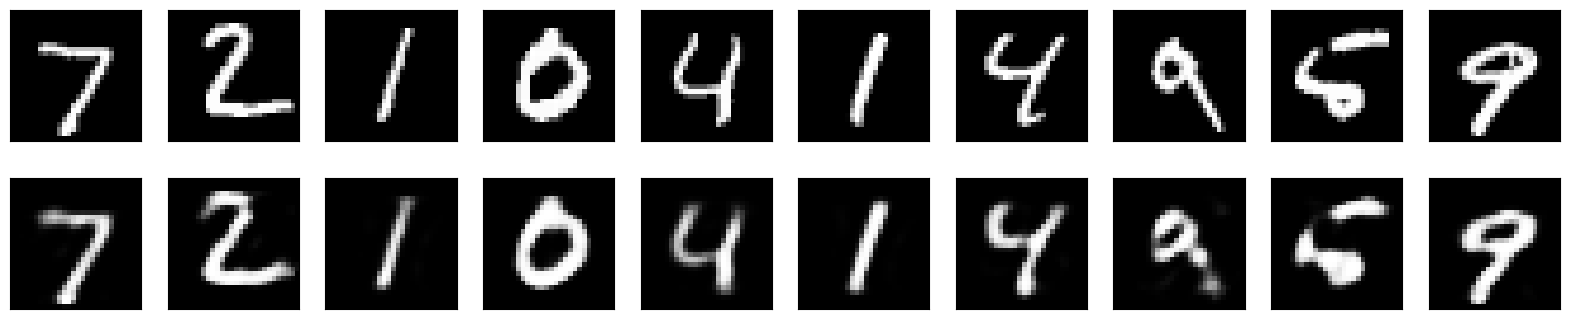

In [38]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()